In [22]:
import torch, torchvision, torchaudio
print(torch.__version__)
print(torchvision.__version__)
print(torchaudio.__version__)

2.3.1
0.18.1
2.3.1


In [23]:
from __future__ import absolute_import, division, print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np

In [24]:
# Chuẩn bị dữ liệu
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Chuyển đổi sang định dạng float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Chuẩn hóa ảnh từ from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.
x_train, x_test, y_train, y_test = torch.from_numpy(x_train), torch.from_numpy(x_test), torch.from_numpy(y_train).type(torch.LongTensor), torch.from_numpy(y_test).type(torch.LongTensor)

In [25]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
# n_hidden_2 = 256 # 2nd layer number of neurons.

In [26]:
batch_size = 16

In [27]:
trainloader = []
for (i,j) in zip(x_train, y_train):
    trainloader.append([i,j])
trainloader = torch.utils.data.DataLoader(trainloader, shuffle = True, batch_size = batch_size)

testloader = []
for (i,j) in zip(x_test, y_test):
    testloader.append([i,j])
testloader = torch.utils.data.DataLoader(testloader, shuffle = True, batch_size = batch_size)

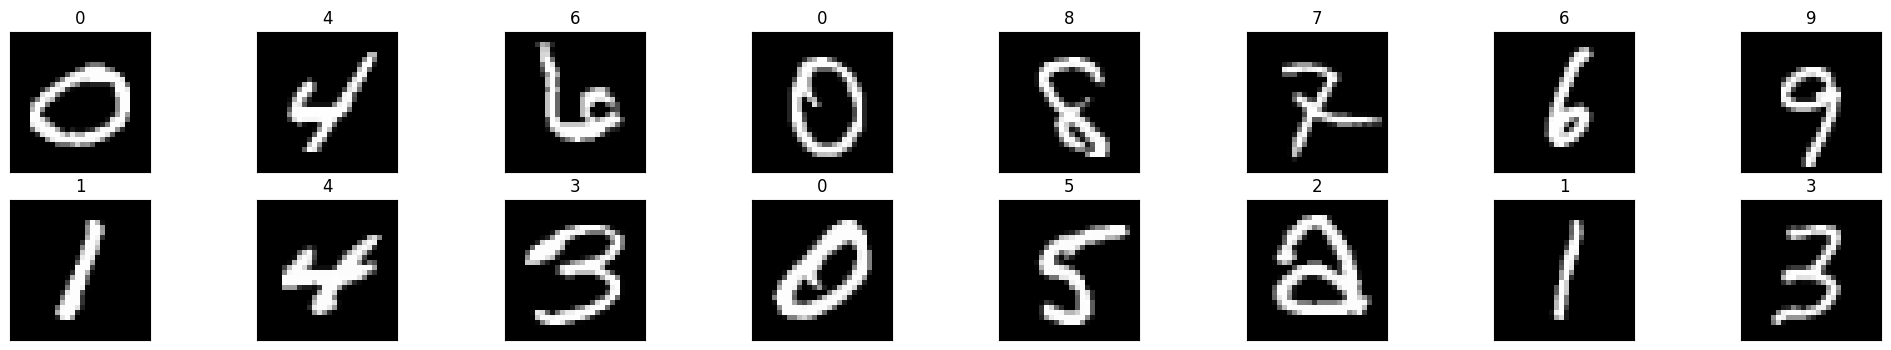

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
    
dataiter = iter(trainloader)
images, labels = next(dataiter)
images = images.numpy()

# hiển thị dữ liệu theo từng batch và nhãn tương ứng
fig = plt.figure(figsize = (25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size // 2, idx + 1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(images[idx]), cmap = 'gray')
    ax.set_title(str(labels[idx].item()))

In [29]:
import torch.nn as nn
import torch.nn.functional as F

## định nghĩa mạng
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(num_features, n_hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(n_hidden_1, num_classes)

    def forward(self, x):
        # chuyển từ định dạng ma trận thành vector
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

# initialize the NN
model = MLPModel()
print(model)

MLPModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [30]:
import torch.optim as optim
# trong hàm loss cross entropy đã áp dụng hàm soft max cho vector đầu ra
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [31]:
def accuracy():
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total

In [32]:
# số lượng epoch = 100

losses = []
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses.append(running_loss)
    if epoch % 10 == 9:
        print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy()))

print('Finished Training')

Iteration: 10, accuracy: 0.962
Iteration: 20, accuracy: 0.974
Iteration: 30, accuracy: 0.976
Iteration: 40, accuracy: 0.978
Iteration: 50, accuracy: 0.979
Iteration: 60, accuracy: 0.979
Iteration: 70, accuracy: 0.979
Iteration: 80, accuracy: 0.979
Iteration: 90, accuracy: 0.979
Iteration: 100, accuracy: 0.979
Finished Training


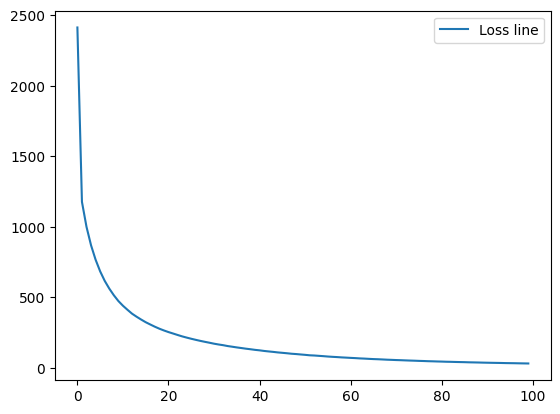

In [33]:
# Biểu đồ biểu diễn độ biến thiên của hàm mất mát qua các vòng lặp
plt.plot([i for i in range(len(losses))], losses, label = 'Loss line')
# plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

# Bài tập 1: Thay đổi số lượng epoch

Iteration: 10, accuracy: 0.980
Iteration: 20, accuracy: 0.980
Iteration: 30, accuracy: 0.980
Iteration: 40, accuracy: 0.979
Iteration: 50, accuracy: 0.980
Finished Training


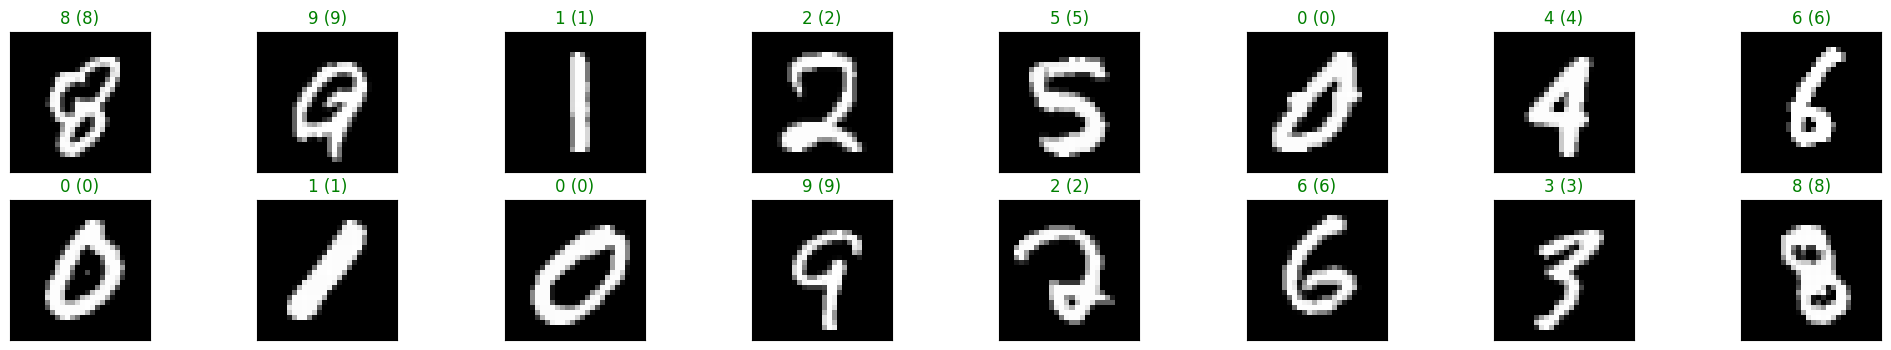

In [37]:
# số lượng epoch = 50

losses1 = []
for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses1.append(running_loss)
    if epoch % 10 == 9:
        print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy()))

print('Finished Training')

# obtain one batch of test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize = (25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size // 2, idx+1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(images[idx]), cmap = 'gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx] == labels[idx] else "red"))

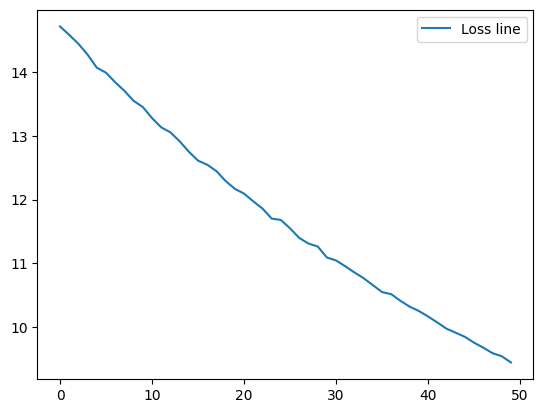

In [38]:
plt.plot([i for i in range(len(losses1))], losses1, label = 'Loss line')
plt.legend()
plt.show()

Iteration: 10, accuracy: 0.980
Iteration: 20, accuracy: 0.979
Iteration: 30, accuracy: 0.980
Iteration: 40, accuracy: 0.979
Iteration: 50, accuracy: 0.980
Iteration: 60, accuracy: 0.979
Iteration: 70, accuracy: 0.979
Iteration: 80, accuracy: 0.979
Iteration: 90, accuracy: 0.979
Iteration: 100, accuracy: 0.979
Iteration: 110, accuracy: 0.979
Iteration: 120, accuracy: 0.979
Iteration: 130, accuracy: 0.979
Iteration: 140, accuracy: 0.979
Iteration: 150, accuracy: 0.979
Finished Training


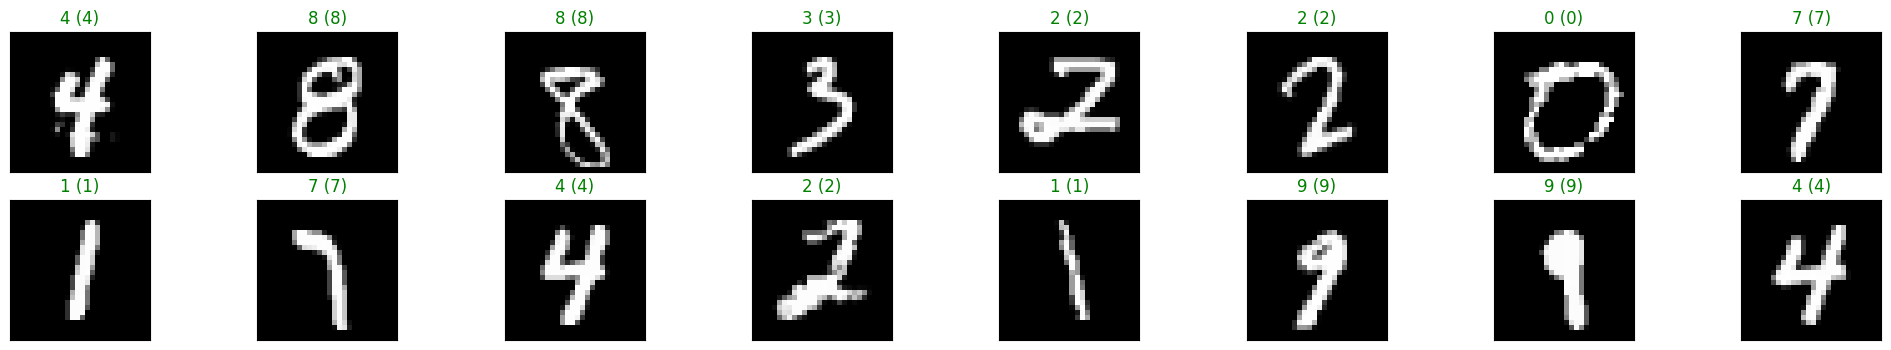

In [39]:
# số lượng epoch = 150

losses2 = []
for epoch in range(150):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses2.append(running_loss)
    if epoch % 10 == 9:
        print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy()))

print('Finished Training')

# obtain one batch of test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize = (25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size // 2, idx + 1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(images[idx]), cmap = 'gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color = ("green" if preds[idx] == labels[idx] else "red"))

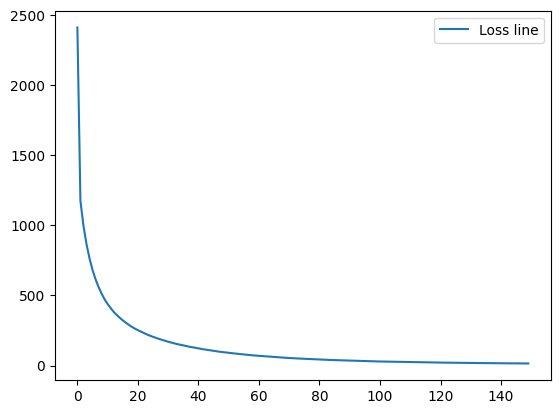

In [40]:
plt.plot([i for i in range(len(losses2))], losses, label = 'Loss line')
plt.legend()
plt.show()

# Bài tập 2: Thiết lập thêm mạng neuron

In [60]:
# Chia tập train thành 85% train và 15% validation
from torch.utils.data import random_split, DataLoader, TensorDataset

train_dataset = TensorDataset(x_train, y_train)
train_data, dev_data = random_split(train_dataset, [int(0.85 * len(train_dataset)), int(0.15 * len(train_dataset))])

In [62]:
train_loader = DataLoader(train_data, batch_size = batch_size, shuffle = True)
dev_loader = DataLoader(dev_data, batch_size = batch_size, shuffle = False)

In [43]:
class MLP_3Layers(nn.Module):
    def __init__(self):
        super(MLP_3Layers, self).__init__()
        self.fc1 = nn.Linear(num_features, 256)  
        self.fc2 = nn.Linear(256, 128)     
        self.fc3 = nn.Linear(128, 64)      
        self.fc4 = nn.Linear(64, 10)      

    def forward(self, x):
        x = x.view(-1, 28*28)  
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model_1 = MLP_3Layers()
model_2 = MLP_3Layers()
print(model_1)
print(model_2)

MLP_3Layers(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
MLP_3Layers(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [45]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_1.parameters(), lr = 0.1)

In [46]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_2.parameters(), lr = 0.05)

In [61]:
class MLP_5Layers(nn.Module):
    def __init__(self):
        super(MLP_5Layers, self).__init__()
        self.fc1 = nn.Linear(num_features, 512)  
        self.fc2 = nn.Linear(512, 256)     
        self.fc3 = nn.Linear(256, 128)      
        self.fc4 = nn.Linear(128, 64)  
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 10)    

    def forward(self, x):
        x = x.view(-1, 28*28)  
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return x

model_3 = MLP_5Layers()
print(model_3)

MLP_5Layers(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=32, bias=True)
  (fc6): Linear(in_features=32, out_features=10, bias=True)
)


In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_3.parameters(), lr = 0.001)

In [68]:
def acc(model, data_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in data_loader:
            images = images.view(-1, 28*28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

models_to_test = {
    "3 hidden layers NN": MLP_3Layers,
    "5 hidden layers NN": MLP_5Layers
}

learning_rates = [0.1, 0.05, 0.001]
num_epochs = 100

results = []
best_dev_acc = 0
best_model_info = {}

for name, model_class in models_to_test.items():
    for lr in learning_rates:
        print(f"\n- Training {name} | Learning Rate = {lr}")
        
        # Khởi tạo model, loss, optimizer
        model = model_class()
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr = lr)
        
        # Huấn luyện mô hình
        for epoch in range(num_epochs):
            model.train()
            running_loss = 0.0
            for images, labels in train_loader:
                images = images.view(-1, 28*28)
                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            if (epoch + 1) % 10 == 0:
                print(f"Epoch [{epoch+1}], Loss: {running_loss/len(train_loader):.4f}")

        # Kiểm thử trên tập dev
        dev_acc = acc(model, dev_loader)
        print(f"Accuracy on validation set: {dev_acc:.2f}%")
        print("------------------------------------------------------")
        
        # Lưu kết quả
        results.append({'model': name, 'lr': lr, 'dev_accuracy': dev_acc})

        if dev_acc > best_dev_acc:
            best_dev_acc = dev_acc
            best_model_info = {
                "name": name,
                "lr": lr,
                "dev_acc": dev_acc,
                "model_state": model.state_dict(),
                "model_class": model_class
            }

print("---------------------------------")
print("\n- Model tốt nhất:")
print(f"Model: {best_model_info['name']} | Learning Rate: {best_model_info['lr']} | Dev Accuracy: {best_model_info['dev_acc']:.2f}%")


- Training 3 hidden layers NN | Learning Rate = 0.1
Epoch [10], Loss: 0.0193
Epoch [20], Loss: 0.0099
Epoch [30], Loss: 0.0000
Epoch [40], Loss: 0.0000
Epoch [50], Loss: 0.0000
Epoch [60], Loss: 0.0000
Epoch [70], Loss: 0.0000
Epoch [80], Loss: 0.0000
Epoch [90], Loss: 0.0000
Epoch [100], Loss: 0.0000
Accuracy on validation set: 98.29%
------------------------------------------------------

- Training 3 hidden layers NN | Learning Rate = 0.05
Epoch [10], Loss: 0.0149
Epoch [20], Loss: 0.0002
Epoch [30], Loss: 0.0001
Epoch [40], Loss: 0.0000
Epoch [50], Loss: 0.0000
Epoch [60], Loss: 0.0000
Epoch [70], Loss: 0.0000
Epoch [80], Loss: 0.0000
Epoch [90], Loss: 0.0000
Epoch [100], Loss: 0.0000
Accuracy on validation set: 98.24%
------------------------------------------------------

- Training 3 hidden layers NN | Learning Rate = 0.001
Epoch [10], Loss: 0.4073
Epoch [20], Loss: 0.2609
Epoch [30], Loss: 0.1825
Epoch [40], Loss: 0.1369
Epoch [50], Loss: 0.1070
Epoch [60], Loss: 0.0857
Epoch 